<a href="https://colab.research.google.com/github/YasmineJiang/codespace/blob/main/Explore_PCA_with_Yale_Face_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_center_dataset(filename):
    x = np.load(filename)
    x_center = x - np.mean(x, axis=0)
    return x_center

In [3]:
def get_covariance(dataset):
    x = dataset
    x_T = np.transpose(x)
    S = 1/(len(x) - 1) * np.dot(x_T, x)
    return S

In [4]:
def get_eig(S, m):

    #Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(S)

    #Sort eigenvalues in dscending order and put eigenvectors in corresponding order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    #Select the m-largest eigenvalues
    mlargest_eigenvalues = eigenvalues[:m]
    m_eigenvectors = eigenvectors[:, :m]
    diagonal_matrix = np.diag(mlargest_eigenvalues)

    return diagonal_matrix, m_eigenvectors

In [5]:
def get_eig_prop(S, prop):

    #Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(S)

    #Sort eigenvalues in dscending order and put eigenvectors in corresponding order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    total_lambda = 0
    lis = []
    for i in eigenvalues:
         total_lambda = total_lambda + i

    for j in eigenvalues:
        if j/total_lambda > prop:
            lis.append(j)
    mlargest_eigenvalues = eigenvalues[:len(lis)]
    diagonal_matrix = np.diag(mlargest_eigenvalues)
    m_eigenvectors = eigenvectors[:, :len(lis)]

    return diagonal_matrix,  m_eigenvectors

In [6]:
def project_image(image, U):

    U_transpose = np.transpose(U)
    pca_projection = np.dot(U_transpose, image)
    x_pca = np.dot(U, pca_projection)

    return x_pca

In [7]:
def display_image(orig, proj):

    reshaped_orig = np.rot90(orig.reshape(32, 32), axes=(1, 0))
    reshaped_proj = np.rot90(proj.reshape(32, 32), axes=(1, 0))
    fig, (ax1, ax2) = plt.subplots(figsize=(9,3), ncols = 2)

    ax1.set_title('Original')
    ax2.set_title('Projection')

    im1 = ax1.imshow(reshaped_orig, aspect='equal', cmap='viridis')
    im2 = ax2.imshow(reshaped_proj, aspect='equal', cmap='viridis')
    fig.colorbar(im1, ax = ax1)
    fig.colorbar(im2, ax = ax2)
    plt.show()

    return fig, ax1, ax2

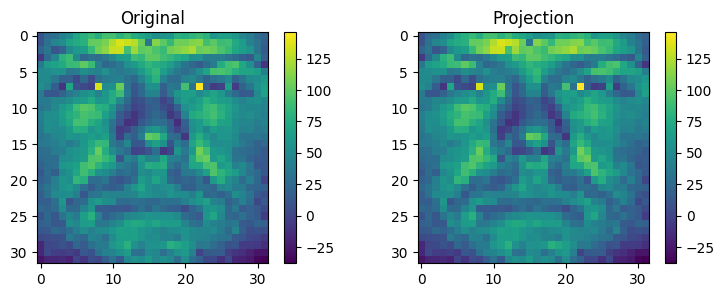

In [8]:
x = load_and_center_dataset('YaleB_32x32.npy')
S = get_covariance(x)
Lambda, U = get_eig(S, 1024)
projection = project_image(x[0], U)
fig = display_image(x[0], projection)